# Задание 7. Нахождение точечных  оценок и параметров модели на ограниченных малых выборках экспериментальных данных

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



Параметры системы:


In [118]:
A0 = 0.2
A1 = 0.2
gamma0 = 0.2
alpha0 = 0.9
alpha1 = 0.8
beta00 = 0.1
beta01 = 0.2
beta10 = -.25
beta11 = 0.2
mu = 1

In [119]:
h_01 = (1-A0)*(1-2*gamma0)*alpha0-A0 + 1
h_02 = -beta00*(1-A0)*gamma0
h_03 = -beta01*(1-A0)*(1-2*gamma0)
h_11 = 2*mu*alpha0*(1-A0)*gamma0 
h_12 = mu*((1-A1)*alpha1-A1) +1
h_13 = -2*mu*beta00*(1-A0)*gamma0
h_14 = -mu*(beta10*(1-A1)+2*beta01*(1-A0)*gamma0)
h_15 = -mu*beta11*(1-A1)

In [120]:
print('h_01 = %5.3f'%(h_01), '; h_02 = %5.3f'%(h_02), '; h_03 = %5.3f'%(h_03), '\nh_11 = %5.3f'%(h_11),\
     '; h_12 = %5.3f'%(h_12),'; h_13 =  %5.3f'%(h_13),'; h_14 =  %5.3f'%(h_14),'; h_15 = %5.3f'%(h_15))

h_01 = 1.232 ; h_02 = -0.016 ; h_03 = -0.096 
h_11 = 0.288 ; h_12 = 1.440 ; h_13 =  -0.032 ; h_14 =  0.136 ; h_15 = -0.160


Шаг по времени возьмем равным единице

In [121]:
dt = 1

Выделим память

In [122]:
N = 100
xArr = np.zeros(N)
yArr = np.zeros(N)

Начальные условия

In [123]:
xInit, yInit = 0.01, 0.1

Определим систему

In [124]:
def system(x, y):
    x_new = h_01*x + h_02*x**2 + h_03 *x*y
    y_new = h_11*x + h_12*y + h_13 *x**2 +h_14*x*y + h_15 *y**2
    return x_new, y_new

Проитерируем систему

In [125]:
x_curr, y_curr = xInit, yInit
for i in range(N):
   xArr[i], yArr[i] = system(x=x_curr,y=y_curr)
   x_curr, y_curr = xArr[i], yArr[i]

In [126]:

#Xeven = xArr[1::2]

#Xodd = xArr[::2]


#Yeven = yArr[1::2]

#Yodd = yArr[::2]

Xeven = xArr[::2]
Xodd = xArr[1::2]

Yeven = yArr[::2]
Yodd = yArr[1::2]

Zx = np.array([Xodd, Xodd**2, Xodd*Yodd])
Zy = np.array([Xodd, Yodd, Xodd**2, Xodd*Yodd, Yodd**2])
H0 = np.array([h_01, h_02, h_03])
H1 = np.array([h_11, h_12, h_13, h_14, h_15])


Сгенерируем и добавим шум

In [127]:
mmu = 0
ssigma = 0.01
eps = np.random.normal(mmu,ssigma, Xeven.shape[0])
teta = np.random.normal(mmu,ssigma, Xeven.shape[0])

Xeven_new = np.matmul(H0, Zx)+eps
Yeven_new = np.matmul(H1, Zy)+teta

Получим оценку параметров

In [128]:
H00 = np.matmul(Xeven_new,np.linalg.pinv(Zx))
H11 = np.matmul(Yeven_new,np.linalg.pinv(Zy))

In [129]:
H00

array([ 1.2599546 , -3.18487974, -0.04531508])

In [130]:
H11

array([ 0.57402477,  1.42413231,  9.75777908, -0.10605612, -0.15406846])

Ошибки

In [131]:
epsCheck = Xeven - np.matmul(H00,Zx)
tetaCheck = Yeven - np.matmul(H11, Zy)

In [132]:
epsCheck[:10]

array([-0.00568486, -0.00738464, -0.00837965, -0.00738714, -0.00400938,
       -0.00027082,  0.00165856,  0.00196519,  0.00163011,  0.00117012])

In [133]:
tetaCheck[:10]

array([-0.15692065, -0.29138514, -0.47767851, -0.62621586, -0.58037563,
       -0.35253841, -0.14819361, -0.04931645, -0.01344277, -0.00156475])

**Проверим ошибки на нормальность. Будем использовать критерий Колмогорова**

In [134]:
normed_epsCheck = (epsCheck-epsCheck.mean())/epsCheck.std()
normed_tetaCheck = (tetaCheck-tetaCheck.mean())/tetaCheck.std()

In [137]:
print(stats.kstest(normed_epsCheck, 'norm'))

KstestResult(statistic=0.42404922420317226, pvalue=1.1335517812452079e-08)


In [138]:
print(stats.kstest(normed_tetaCheck, 'norm'))

KstestResult(statistic=0.45473232247623413, pvalue=5.751773903287353e-10)


В двух случаях критерий отвергает H0 гипотезу о нормальности распределения ошибок

In [114]:
import matplotlib.pyplot as plt

**Построим гистограммы ошибок**

(array([13.,  7.,  5.,  4.,  4.,  4.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([-0.60833316, -0.52470908, -0.44108499, -0.3574609 , -0.27383682,
        -0.19021273, -0.10658864, -0.02296455,  0.06065953,  0.14428362,
         0.22790771,  0.3115318 ,  0.39515588,  0.47877997,  0.56240406,
         0.64602814,  0.72965223,  0.81327632,  0.89690041,  0.98052449,
         1.06414858,  1.14777267,  1.23139676,  1.31502084,  1.39864493,
         1.48226902,  1.5658931 ,  1.64951719,  1.73314128,  1.81676537,
         1.90038945,  1.98401354,  2.06763763,  2.15126172,  2.2348858 ,
         2.31850989,  2.40213398,  2.48575806,  2.56938215,  2.65300624,
         2.73663033,  2.82025441,  2.9038785 ,  2.98750259,  3.07112667,
         3.15475076,  3.23837485,  3.32199894,  3.40562302,

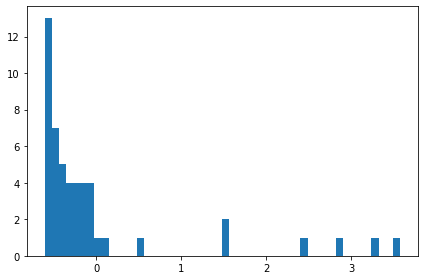

In [115]:

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(normed_epsCheck, bins=50)

(array([ 2.,  0.,  0.,  0.,  1.,  0.,  0.,  1., 18., 25.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([-2.99377521, -2.66542671, -2.3370782 , -2.00872969, -1.68038119,
        -1.35203268, -1.02368417, -0.69533566, -0.36698716, -0.03863865,
         0.28970986,  0.61805836,  0.94640687,  1.27475538,  1.60310389,
         1.93145239,  2.2598009 ,  2.58814941,  2.91649792,  3.24484642,
         3.57319493]),
 <BarContainer object of 20 artists>)

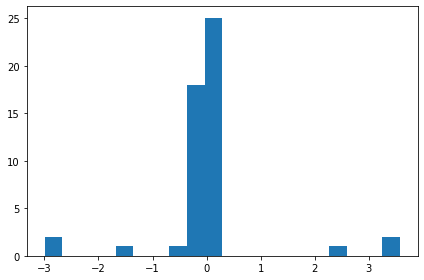

In [116]:

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(normed_tetaCheck, bins=20)